In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-csv/test.csv
/kaggle/input/ames-housing-dataset/AmesHousing.csv


In [2]:
df=pd.read_csv('/kaggle/input/ames-housing-dataset/AmesHousing.csv')
print(df.head())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [3]:
missing_cols = df.columns[df.isnull().any()]
print(missing_cols.tolist())


['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']


In [4]:
def handle_missing_values(df):
    """
    Handles missing values in the housing dataset:
    - Fills 'None' for categorical features indicating absence
    - Fills 0 for numeric features where missing implies absence
    - Uses median or mode for genuine missing values
    - Skips columns not present in the input DataFrame
    """
    # 1. Categorical features where NA → 'None'
    fill_none_cols = [
        'Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
        'BsmtFin Type 1', 'BsmtFin Type 2', 'Fireplace Qu',
        'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
        'Fence', 'Pool QC', 'Misc Feature', 'Alley'
    ]
    for col in fill_none_cols:
        if col in df.columns:
            df[col] = df[col].fillna('None')

    # 2. Numeric features where NA → 0
    fill_zero_cols = [
        'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
        'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
        'Garage Cars', 'Garage Area'
    ]
    for col in fill_zero_cols:
        if col in df.columns:
            df[col] = df[col].fillna(0)

    # 3. Median fill for continuous numeric variables
    if 'Lot Frontage' in df.columns:
        df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].median())
    if 'Garage Yr Blt' in df.columns:
        df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(df['Garage Yr Blt'].median())

    # 4. Mode fill for categorical variables
    if 'Electrical' in df.columns:
        df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

    return df


In [5]:
handle_missing_values(df)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,None,IR1,Lvl,...,0,None,None,None,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,None,Reg,Lvl,...,0,None,MnPrv,None,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,None,IR1,Lvl,...,0,None,None,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,None,Reg,Lvl,...,0,None,None,None,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,None,IR1,Lvl,...,0,None,MnPrv,None,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,None,IR1,Lvl,...,0,None,GdPrv,None,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,68.0,8885,Pave,None,IR1,Low,...,0,None,MnPrv,None,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,None,Reg,Lvl,...,0,None,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,None,Reg,Lvl,...,0,None,None,None,0,4,2006,WD,Normal,170000


In [6]:
df.isnull().sum().sort_values(ascending=False).head(15)

Order             0
Garage Finish     0
Garage Type       0
Fireplace Qu      0
Fireplaces        0
Functional        0
TotRms AbvGrd     0
Kitchen Qual      0
Kitchen AbvGr     0
Bedroom AbvGr     0
Half Bath         0
Full Bath         0
Bsmt Half Bath    0
Bsmt Full Bath    0
Gr Liv Area       0
dtype: int64

In [7]:
def encode_features(df):
    """
    Encodes categorical variables:
    - Applies ordinal mapping to quality-related features
    - Applies one-hot encoding to nominal categorical features
    """
    # 1. Ordinal features with logical ranks
    quality_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
    ordinal_cols = [
        'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond',
        'Heating QC', 'Kitchen Qual', 'Fireplace Qu',
        'Garage Qual', 'Garage Cond', 'Pool QC'
    ]
    for col in ordinal_cols:
        if col in df.columns:
            df[col] = df[col].map(quality_map)

    # 2. One-hot encoding for nominal features
    nominal_cols = [
        'MS Zoning', 'Street', 'Neighborhood', 'Condition 1', 'Condition 2',
        'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
        'Exterior 1st', 'Exterior 2nd', 'Heating', 'Electrical',
        'Functional', 'Garage Type', 'Garage Finish', 'Paved Drive',
        'Sale Type', 'Sale Condition', 'Foundation', 'Lot Config',
        'Land Slope', 'Land Contour', 'Lot Shape', 'Misc Feature',
        'Fence', 'Alley', 'Mas Vnr Type', 'Bsmt Exposure',
        'BsmtFin Type 1', 'BsmtFin Type 2', 'Central Air', 'Utilities'
    ]
    df = pd.get_dummies(df, columns=[col for col in nominal_cols if col in df.columns], drop_first=True)

    return df

In [8]:
df = encode_features(df)

In [9]:
print(df.select_dtypes(include='object').columns)  # Should be empty
print(df.isnull().sum().sum()) 

Index([], dtype='object')
0


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr(numeric_only = True)
print('SalePrice' in corr_matrix.columns)

True


In [11]:
top_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(20).index.tolist()
print(top_features)

['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Kitchen Qual', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Bsmt Qual', 'Year Built', 'Full Bath', 'Fireplace Qu', 'Year Remod/Add', 'Foundation_PConc', 'Garage Yr Blt', 'Mas Vnr Area', 'TotRms AbvGrd', 'Fireplaces', 'BsmtFin Type 1_GLQ']


In [12]:
final_features = ['Overall Qual', 'Gr Liv Area', 'Year Remod/Add', 'Year Built', 'Fireplaces', 'Total Bsmt SF', '1st Flr SF', 'BsmtFin Type 1_GLQ', 'Garage Cars', 'Garage Area', 'Full Bath', 'Garage Yr Blt', 'TotRms AbvGrd', 'Mas Vnr Area', 'Foundation_PConc']

In [13]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import shap

In [14]:
# Drop rows with missing target
df_encoded = encode_features(df)
df_encoded = df_encoded[df_encoded['SalePrice'].notnull()]

#X = df_encoded[final_features]
all_features = [col for col in df_encoded.columns if col != 'SalePrice']
X = df_encoded[all_features]
y = np.log1p(df_encoded['SalePrice'])

# --------------------------------------
# 4. 📊 Train-validation split (80/20)
# --------------------------------------
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------------------
# 5. 🧠 Train XGBoost
# --------------------------------------
xgb_final = XGBRegressor(
    n_estimators=388,
    max_depth=4,
    learning_rate=0.02,
    subsample=0.993,
    colsample_bytree=0.8,
    gamma=0.05,
    reg_alpha=1.0,
    reg_lambda=0.07,
    random_state=42
)
xgb_final.fit(X_train, y_train)

# --------------------------------------
# 6. 📈 Evaluate
# --------------------------------------
y_pred_log = xgb_final.predict(X_val)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_val)

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"Validation RMSE: {rmse:.2f}")

Validation RMSE: 25381.81


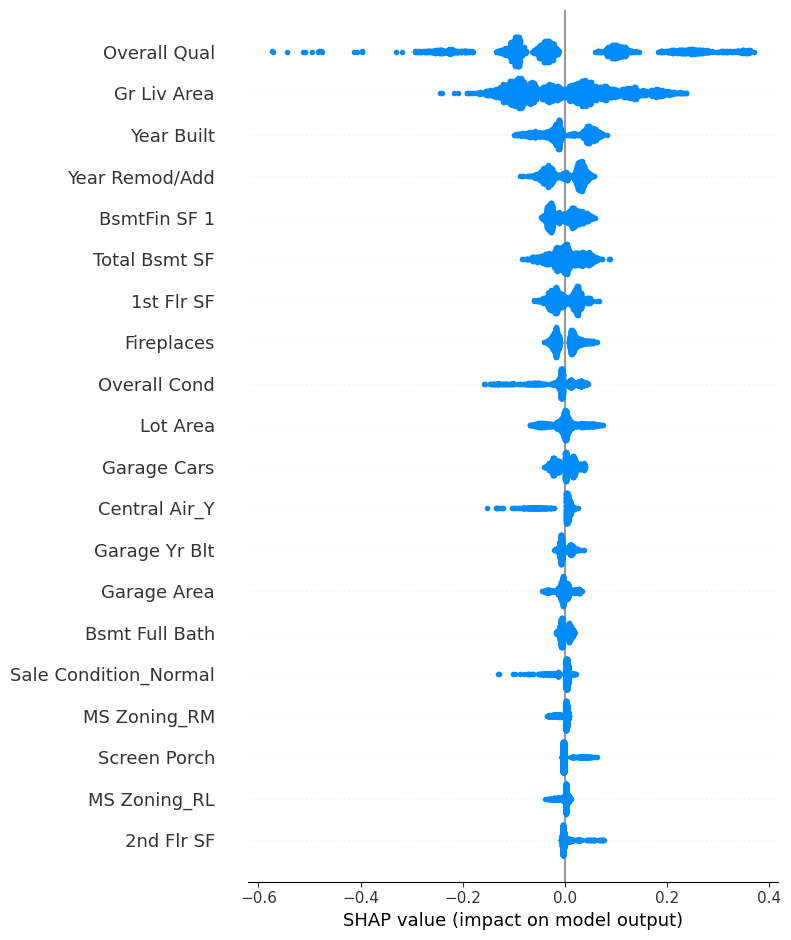

In [15]:
import shap

# Use TreeExplainer for XGBoost
explainer = shap.Explainer(xgb_final)

# Apply to validation or full feature matrix
shap_values = explainer(X_train)  # or use X if you're analyzing full data

# Global feature importance plot
shap.summary_plot(shap_values,corr_matrix['SalePrice'].abs().sort_values(ascending=False).index.tolist() , plot_type="dot")


In [16]:
import numpy as np

# Compute mean absolute SHAP values for each feature
shap_values_abs = np.abs(shap_values.values).mean(axis=0)

# Map to feature names
feature_importance = dict(zip(X_train.columns, shap_values_abs))

# Sort descending
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Convert to a ranked list of feature names
top_features = [feature for feature, importance in sorted_features]
print(top_features)


['Overall Qual', 'Gr Liv Area', 'Year Built', 'Year Remod/Add', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF', 'Fireplaces', 'Overall Cond', 'Lot Area', 'Garage Cars', 'Central Air_Y', 'Garage Yr Blt', 'Garage Area', 'Bsmt Full Bath', 'Sale Condition_Normal', 'MS Zoning_RM', 'Screen Porch', 'MS Zoning_RL', '2nd Flr SF', 'Wood Deck SF', 'Paved Drive_Y', 'Full Bath', 'Open Porch SF', 'Bsmt Exposure_Gd', 'BsmtFin Type 1_GLQ', 'PID', 'Neighborhood_Crawfor', 'Condition 1_Norm', 'Functional_Typ', 'Order', 'Bsmt Exposure_No', 'Garage Finish_Unf', 'Lot Frontage', 'Half Bath', 'Exterior 1st_BrkFace', 'Bsmt Unf SF', 'Sale Condition_Partial', 'Garage Type_Attchd', 'Garage Type_Detchd', 'Neighborhood_Edwards', 'Sale Type_New', 'House Style_1Story', 'Foundation_PConc', 'MS SubClass', 'Lot Shape_Reg', 'Enclosed Porch', 'Neighborhood_CollgCr', 'TotRms AbvGrd', 'MS Zoning_FV', 'Yr Sold', 'Mas Vnr Area', 'Neighborhood_NAmes', 'Mo Sold', 'Exterior 1st_VinylSd', 'Kitchen AbvGr', 'Neighborhood_OldTown', '

In [17]:
#train on full DS
# X and y already contain all your encoded features and log-transformed target
xgb_final_full = XGBRegressor(
    n_estimators=388,
    max_depth=4,
    learning_rate=0.02,
    subsample=0.993,
    colsample_bytree=0.8,
    gamma=0.05,
    reg_alpha=1.0,
    reg_lambda=0.07,
    random_state=42
)

# Full data training—no split
xgb_final_full.fit(X, y)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.05, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=388, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

# Run 5-fold cross-validation
cv_rmse = cross_val_score(
    xgb_final_full, X, y, cv=5, scoring=rmse_scorer
)

print(f"CV RMSE (avg): {-cv_rmse.mean():.2f}")
print(f"CV RMSE (std): {cv_rmse.std():.2f}")


CV RMSE (avg): 0.13
CV RMSE (std): 0.01


In [19]:
y_pred_log = xgb_final_full.predict(X)
y_pred = np.expm1(y_pred_log)
y_actual = np.expm1(y)

rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
print(f"Final Training RMSE: {rmse:.2f}")


Final Training RMSE: 18519.92


In [20]:
test_df = pd.read_csv('/kaggle/input/test-csv/test.csv')
test_df=handle_missing_values(test_df)
# Encode features
test_encoded = encode_features(test_df) 

In [21]:
# Align with training columns and fill missing values
X_test_final = test_encoded.reindex(columns=X.columns).fillna(0)


In [22]:
y_test_pred_log = xgb_final_full.predict(X_test_final)
y_test_pred = np.expm1(y_test_pred_log)

submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': y_test_pred
})
submission.to_csv('submission.csv', index=False)
